<a href="https://colab.research.google.com/github/haricash/cnn-resources/blob/main/nvidia_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[30000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 156, 205,
        254, 255, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


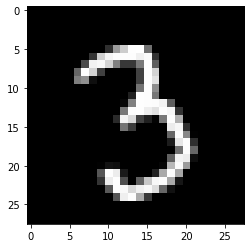

In [ ]:
image = x_train[30000]
plt.imshow(image, cmap='gray')

In [ ]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [ ]:
# Normalizing the data. More on this later
x_train = x_train/255
x_valid = x_valid/255

### Categorically encoding values

In [ ]:
import tensorflow.keras as keras
num_categories = 10

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [ ]:
from tensorflow.keras.models import Sequential
# This instantiates the model type
model = Sequential()

In [ ]:
# This adds layers to the model
from tensorflow.keras.layers import Dense
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [ ]:
model.add(Dense(units=512, activation='relu'))

In [ ]:
model.add(Dense(units=10, activation='softmax'))

In [ ]:
# Summarising the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sys import version
history = model.fit(x_train, y_train,
                    epochs = 5,
                    verbose = 1,
                    validation_data=(x_valid,y_valid)
                    )

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1894 - accuracy: 0.9442 - val_loss: 0.1023 - val_accuracy: 0.9726
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1013 - accuracy: 0.9742 - val_loss: 0.1184 - val_accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0850 - accuracy: 0.9800 - val_loss: 0.1502 - val_accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0751 - accuracy: 0.9836 - val_loss: 0.1342 - val_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0645 - accuracy: 0.9861 - val_loss: 0.1217 - val_accuracy: 0.9790
